#  Evaluating the Performance of a Classification Model: Metrics and Techniques

* Confusion Matrix
* Accuracy
* Recall
* Precision
* F1
* Classification Report
* RoC
* Precision-Recall Curve
* Cumulative Gains Plot
* Lift Curve
* Class Balance
* Class Prediction Error
* Discrimination Threshold

## 1) Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a binary or multiclass classification model. It shows the number of correct and incorrect predictions made by the model, grouped by each class. The confusion matrix provides information about false negatives, false positives, true negatives, and true positives, which are used to compute various evaluation metrics.

In [1]:
#to plots the model performance metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import numpy as np

In [2]:
'''
here below we have a list of predicted values and a list of actual values.
for the understanding of the model performance.
'''
Predicted = [1, 1, 0, 1, 1, 0, 1, 0, 1, 1] 
Actual =    [1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

The function confusion_matrix(Predicted, Actual) generates a 2x2 confusion matrix, which contains four values:

* True Positives (TP): the number of times the model correctly predicted the positive class (1).
* False Positives (FP): the number of times the model predicted the positive class, but it was actually negative (0).
* True Negatives (TN): the number of times the model correctly predicted the negative class (0).
* False Negatives (FN): the number of times the model predicted the negative class, but it was actually positive (1).

[[2 1]
 [1 6]]


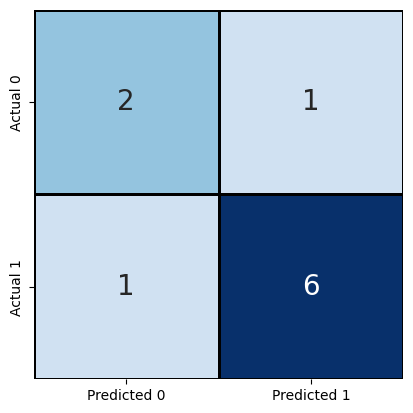

In [3]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Predicted, Actual))
# plot the confusion matrix
sns.heatmap(confusion_matrix(Predicted, Actual), annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 20}, xticklabels=['Predicted 0', 'Predicted 1'],
             yticklabels=['Actual 0', 'Actual 1'], linewidths=2, linecolor='black', square=True, vmin=0, vmax=5, cbar_kws={"shrink": .5})
plt.show()

## 2) Accuracy 
Accuracy is a simple metric that measures the overall correct classification rate of a model. It's the ratio of correct predictions to the total number of predictions.

> accuracy = (number of correct predictions) / (total number of predictions)

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Predicted, Actual))

0.8


## 3) Recall Score
Recall (also known as Sensitivity or True Positive Rate): It measures the proportion of positive instances that were correctly predicted by the model. The formula for recall is:
> recall = (number of true positive predictions) / (number of true positive predictions + number of false negative predictions)


In [14]:
from sklearn.metrics import recall_score
print(recall_score(Predicted, Actual))

0.8571428571428571


## 4) Precision Score
Precision: It measures the proportion of true positive predictions among all positive predictions made by the model. The formula for precision is:

> precision = (number of true positive predictions) / (number of true positive predictions + number of false positive predictions)


In [15]:
from sklearn.metrics import precision_score
print(precision_score(Predicted, Actual))

0.8571428571428571


## 5) F1 Score
It is the harmonic mean of precision and recall. The formula for F1 score is:

> F1 = 2 * (precision * recall) / (precision + recall)



In [16]:
from sklearn.metrics import f1_score
print(f1_score(Predicted, Actual))

0.8571428571428571


## 6) Classification Report

A classification report is a summary of the performance of a binary or multi-class classification model, used to evaluate the accuracy of the model's predictions. It provides several metrics that give a comprehensive view of the model's performance, including precision, recall, f1-score, and support.

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Predicted, Actual))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In the output, the precision metric is the ratio of true positive predictions to all positive predictions made by the model. The recall metric is the ratio of true positive predictions to all actual positive samples in the data. The f1-score is the harmonic mean of precision and recall, which provides a balanced view of the model's performance. The support column provides the number of samples of each class in the data. The weighted average provides an overall average, which takes into account the class imbalance.

## 7) RoC Curve
Receiver Operating Characteristic (ROC) is a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied. The ROC plot is a commonly used tool in machine learning and data mining, especially in the field of pattern recognition and information retrieval.

An ROC plot plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The TPR is the proportion of positive instances that are correctly classified as positive, and the FPR is the proportion of negative instances that are incorrectly classified as positive.

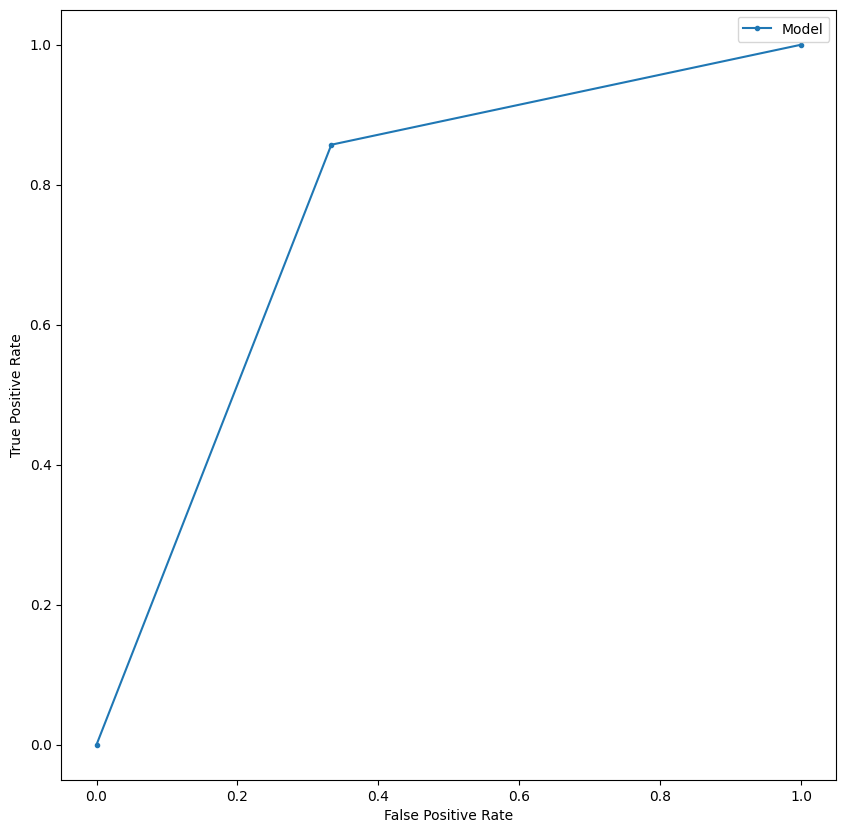

In [18]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 10))
# calculate roc curves
fpr, tpr, thresholds = roc_curve(Predicted, Actual)
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.', label='Model')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## 8) Precision-Recall Curve
Precision-Recall Curve is a graphical representation of the trade-off between precision and recall for a binary classification problem. Precision is the proportion of true positive predictions among all positive predictions made by the model, while recall is the proportion of true positive predictions among all actual positive samples in the dataset.

A Precision-Recall Curve plots the recall on the y-axis and precision on the x-axis, and the curve shows the relationship between precision and recall as the classification threshold is varied. In other words, it shows how the balance between precision and recall changes as we require more positive predictions from the model. The curve helps us to visualize the performance of the model for different levels of recall and precision, and it is often used to evaluate the effectiveness of a classifier, especially when the dataset is imbalanced (i.e., one class has much more samples than the other).

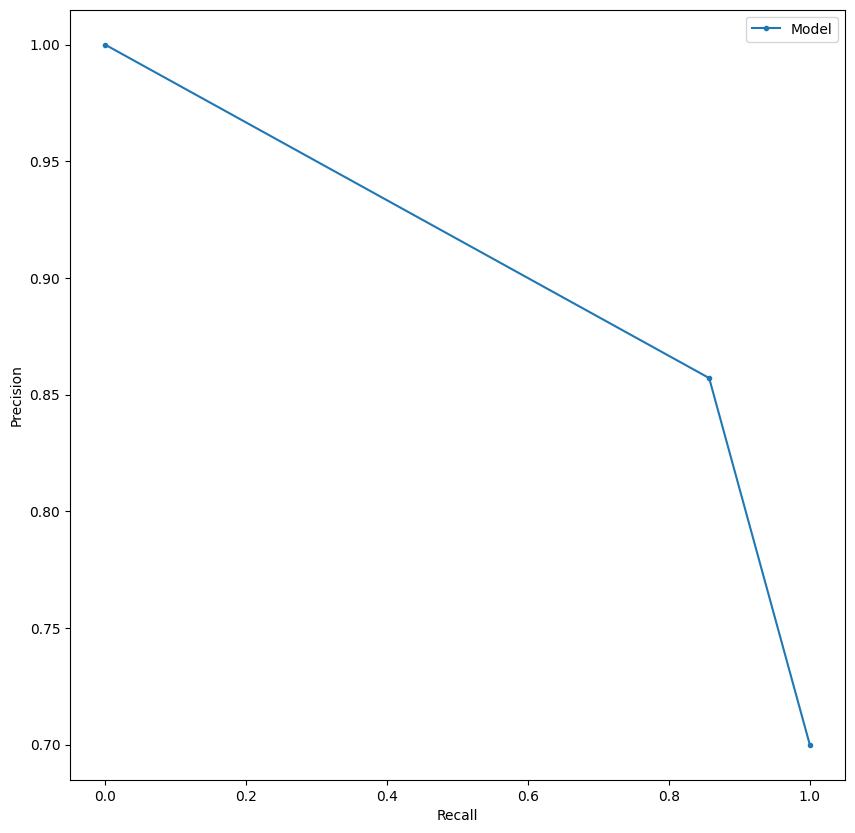

In [19]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 10))
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(Predicted, Actual)
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.', label='Model')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## 9) Cumulative Gains Plot
A cumulative gains plot is a graph that shows the performance of a binary classification model as the number of positive instances increases. It plots the cumulative number of true positive instances on the y-axis and the cumulative number of instances selected as positive by the model on the x-axis.

The cumulative gains plot is useful for evaluating the model's performance at different thresholds and can help to find the optimal threshold for classifying instances as positive. For example, a model that classifies all instances as positive will have a 100% cumulative gain, but this is not desirable because it also classifies many negative instances as positive. On the other hand, a model that only classifies a few instances as positive will have a low cumulative gain, but it will also have a low false positive rate.

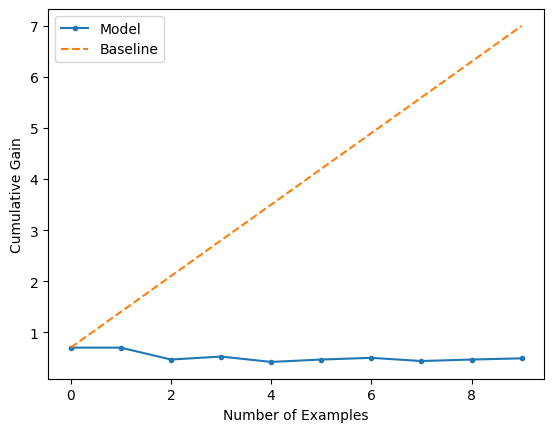

In [20]:
# function for cumulative_gain_curve using Actual and Predicted values
def cumulative_gain_curve(Actual, Predicted):
    # calculate the number of positive examples
    n_positive = sum(Actual)
    # calculate the number of negative examples
    n_negative = len(Actual) - n_positive
    # calculate the proportion of positive examples
    proportion_positive = n_positive / (n_positive + n_negative)
    # calculate the cumulative gains
    cumulative_gain = proportion_positive * np.cumsum(Actual) / np.arange(1, len(Actual) + 1)
    # calculate the cumulative baseline
    cumulative_baseline = np.arange(1, len(Actual) + 1) * proportion_positive
    # plot the cumulative gain curve
    plt.plot(cumulative_gain, marker='.', label='Model')
    plt.plot(cumulative_baseline, linestyle='--', label='Baseline')
    # axis labels
    plt.xlabel('Number of Examples')
    plt.ylabel('Cumulative Gain')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
 
cumulative_gain_curve(Actual, Predicted)

## 10) Lift Curve
A Lift Curve is a graphical representation of the performance of a binary classification model. It shows the relationship between the true positive rate (TPR) and the false positive rate (FPR) of a model at different threshold values. A perfect model would have a lift curve that starts at the origin (0,0), increases rapidly in the beginning and then approaches a constant value. A poor model, on the other hand, would have a lift curve that increases more slowly and plateaus at a much lower value.

The Lift Curve can be calculated by first creating a Receiver Operating Characteristic (ROC) curve, and then plotting the ratio of the true positive rate to the false positive rate at each threshold value. The ROC curve is a plot of the TPR against the FPR at various threshold values.


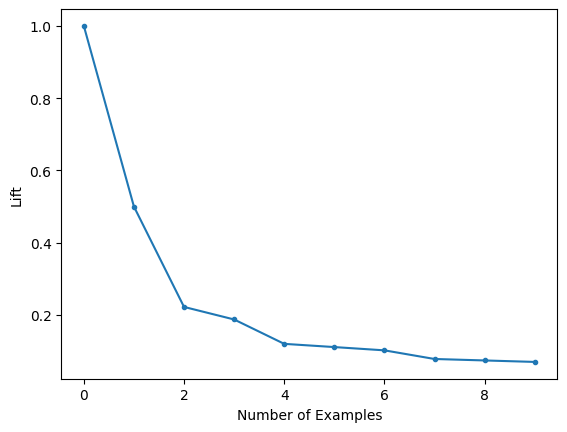

In [21]:
# function for lift_curve using Actual and Predicted values
def lift_curve(Actual, Predicted):
    # calculate the number of positive examples
    n_positive = sum(Actual)
    # calculate the number of negative examples
    n_negative = len(Actual) - n_positive
    # calculate the proportion of positive examples
    proportion_positive = n_positive / (n_positive + n_negative)
    # calculate the cumulative gains
    cumulative_gain = proportion_positive * np.cumsum(Actual) / np.arange(1, len(Actual) + 1)
    # calculate the cumulative baseline
    cumulative_baseline = np.arange(1, len(Actual) + 1) * proportion_positive
    # calculate the lift
    lift = cumulative_gain / cumulative_baseline
    # plot the lift curve
    plt.plot(lift, marker='.', label='Model')
    # axis labels
    plt.xlabel('Number of Examples')
    plt.ylabel('Lift')
    # show the plot
    plt.show()

lift_curve(Actual, Predicted)

## 11) Class Prediction Error
Class prediction error (CPE) is a measure of the accuracy of a classification model. It represents the proportion of instances that are misclassified by the model. CPE is calculated as the number of incorrect predictions divided by the total number of instances.

For example, if a model is trained on 100 instances and makes 8 incorrect predictions, the class prediction error would be 8/100 = 0.08 or 8%.

It's important to note that class prediction error is a general metric that can be used for any type of classification model, including binary, multiclass, and multilabel classification. The calculation of class prediction error is straightforward and provides a quick measure of model performance.

However, CPE alone may not be sufficient to fully evaluate a model's performance, especially when working with imbalanced datasets. In such cases, other metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC) may provide a more complete picture of the model's performance.

In [23]:
# Calculate the number of incorrect predictions
incorrect_predictions = np.sum(Actual != Predicted)
# Calculate the total number of instances
n = len(Actual)

# Calculate class prediction error
cpe = incorrect_predictions / n

print("Class Prediction Error:", cpe)

Class Prediction Error: 0.1


## 12) Discrimination Threshold
The discrimination threshold, also known as the decision threshold or the classification threshold, is a parameter that determines the point at which a binary classifier will assign an instance to one class or the other. In other words, it's the value that separates positive predictions from negative predictions.

In a binary classifier, the predicted class is determined by comparing the predicted class probability to the discrimination threshold. If the predicted class probability is greater than the threshold, the instance is assigned to the positive class; otherwise, it's assigned to the negative class.

The discrimination threshold can have a significant impact on the performance of a binary classifier, especially when working with imbalanced datasets. A high threshold can lead to high specificity (low false positive rate) but low sensitivity (low true positive rate), while a low threshold can lead to low specificity (high false positive rate) but high sensitivity (high true positive rate).

Tuning the discrimination threshold is an important step in the evaluation and optimization of binary classifiers, and can be done using methods such as receiver operating characteristic (ROC) analysis, precision-recall curves, or F1 optimization.